In [7]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

In [8]:
os.chdir("C:\\Users\\Админ\\Lect_04\\задача_1_леденцы")

In [9]:
df = pd.read_csv("Леденцы.dat", sep=";")

In [10]:
print(df)

     V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11
0     4   5   5   5   3   3   3   3   3    3    3
1     5   4   5   5   3   3   3   3   3    3    3
2     5   5   4   5   3   3   3   3   3    3    3
3     5   4   5   5   3   3   3   3   3    3    3
4     4   5   5   5   3   3   3   3   3    3    3
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...
333   3   3   3   3   3   3   5   5   3    3    3
334   3   3   3   3   3   3   5   5   3    3    3
335   3   3   3   3   3   3   5   5   3    3    3
336   3   3   3   3   3   3   5   5   3    3    3
337   3   3   3   3   3   3   5   5   3    3    3

[338 rows x 11 columns]


Данные равнозначны, поэтому нормализовать не надо.

Построим каменистую осыпь, чтобы определить количество кластеров.

In [12]:
from sklearn.cluster import KMeans

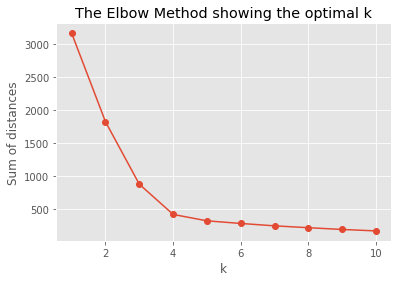

In [13]:
K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42).fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Заметим, что излом наблюдается,когда k = 4. Посмотрим на результаты кластеризации, когда количество кластеров 4.

In [14]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(df)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
0,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
1,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
2,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098
3,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111


Проверим, что в каждом кластере дастаточное число наблюдений, чтобы можно было интерпретировать результат.

In [15]:
df.groupby('cluster').size()

cluster
0    110
1     59
2     61
3    108
dtype: int64

Действительно, результат можно интерпретировать.

В первый кластер попадают люди, которые едят леденцы в медецинских целях.

Во второй, те, кто страдает от запаха изо рта.

В третий, те, кто едят их для повышения концентрации.

В четвертый, те, кто любят сладости.